<a href="https://colab.research.google.com/github/angielpenap-debug/Bici-al-Trabajo-2026/blob/main/Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

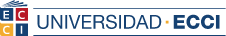
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

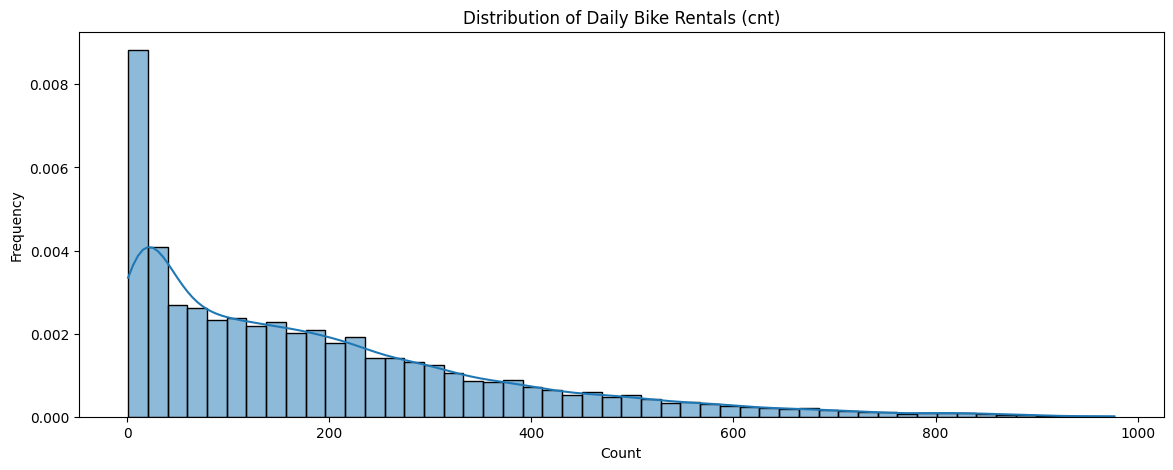

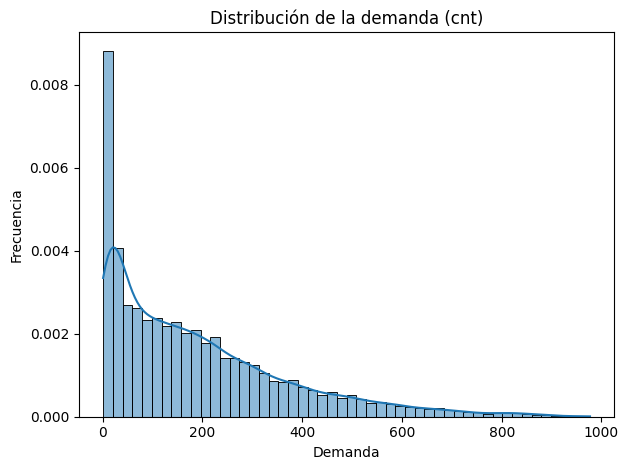


=== D’Agostino K^2 en log(W) ===
Estadístico: 3,459.832 | p-valor: 0.000e+00

Interpretación sugerida:
- Si el histograma y QQ-plot de W muestran cola derecha marcada y p-valor pequeño, la Normal NO es buen modelo para W.
- Si log(W) se ve más lineal en el QQ-plot y el ajuste visual mejora, un modelo log-normal puede ser más razonable.
- Con n muy grande, p-valores tienden a ser muy pequeños incluso por desviaciones leves; revisa también skew/kurtosis y los gráficos.


In [15]:
import seaborn as sns
from scipy import stats # Import stats here

# 1. Visualización
plt.figure(figsize=(14, 5))
sns.histplot(df['cnt'], bins=50, stat='density', kde=True) # Use sns.histplot for plotting histogram
plt.title('Distribution of Daily Bike Rentals (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['cnt'], bins=50, stat='density', kde=True) # Corrected variable name from W to df['cnt'] and used sns.histplot
plt.title("Distribución de la demanda (cnt)")
plt.xlabel("Demanda")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Prueba en log
# Corrected variable name from Y to df['cnt']
k2_stat_log, k2_p_log = stats.normaltest(df['cnt'], nan_policy='omit')
print("\n=== D’Agostino K^2 en log(W) ===")
print(f"Estadístico: {k2_stat_log:,.3f} | p-valor: {k2_p_log:.3e}")

print("\nInterpretación sugerida:")
print("- Si el histograma y QQ-plot de W muestran cola derecha marcada y p-valor pequeño, la Normal NO es buen modelo para W.")
print("- Si log(W) se ve más lineal en el QQ-plot y el ajuste visual mejora, un modelo log-normal puede ser más razonable.")
print("- Con n muy grande, p-valores tienden a ser muy pequeños incluso por desviaciones leves; revisa también skew/kurtosis y los gráficos.")

### **Interpretación pregunta 1**

In [17]:
n = len(df['cnt'])
media = df['cnt'].mean()
varianza_muestral = df['cnt'].var()

print(f"Tamaño muestral: {n}")
print(f"Media (μ̂): {media:.2f}")
print(f"Varianza muestral: {varianza_muestral:.2f}")

Tamaño muestral: 17379
Media (μ̂): 189.46
Varianza muestral: 32901.46


**PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

# Calcular la correlación de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Correlación de Pearson:")
display(pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nCorrelación de Spearman:")
display(spearman_corr)

Correlación de Pearson:


,cnt,temp,hum,windspeed
cnt,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
hum,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000



Correlación de Spearman:


,cnt,temp,hum,windspeed
cnt,1.000000,0.423330,-0.359614,0.126629
temp,0.423330,1.000000,-0.055408,-0.009719
hum,-0.359614,-0.055408,1.000000,-0.293913
windspeed,0.126629,-0.009719,-0.293913,1.000000


### **Interpretación pregunta 2**


## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**


El Teorema del Límite Central (TLC) establece que, bajo ciertas condiciones, la distribución de la media muestral se aproxima a una normal conforme el tamaño de muestra
𝑛
n crece, independientemente de la distribución original de la población

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# 1. Filtrar datos de días laborales
import numpy as np, pandas as pd
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()

# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500
# Test de hipótesis: ¿media de cnt_laborales >= 4500?
from scipy.stats import ttest_1samp

# Ejecutamos t-test
t_stat, p_val_bilateral = ttest_1samp(cnt_laborales, valor_hipotesis)

# Como la prueba es unilateral (H1: media > 4500):
if t_stat > 0:
    p_val_unilateral = p_val_bilateral / 2
else:
    p_val_unilateral = 1 - (p_val_bilateral / 2)

print(f"Media muestral = {cnt_laborales.mean():.2f}")
print(f"T-Statistic = {t_stat:.4f}")
print(f"P-valor (unilateral) = {p_val_unilateral:.4f}")

# Decisión con α=0.05
alpha = 0.05
if p_val_unilateral < alpha:
    print("✅ Rechazamos H0: la media de cnt en días laborales es significativamente mayor a 4500.")
else:
    print("❌ No podemos rechazar H0: no hay evidencia suficiente de que la media sea mayor a 4500.")

#Si el p-valor < 0.05, concluimos que efectivamente la media de cnt en días laborales es significativamente mayor a 4500.

#Si no, decimos que no hay suficiente evidencia.

Media muestral = 193.21
T-Statistic = -2534.3339
P-valor (unilateral) = 1.0000
❌ No podemos rechazar H0: no hay evidencia suficiente de que la media sea mayor a 4500.


### **Interpretación pregunta 4**

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

Mediana observada (muestra): 142.00
Mediana bootstrap (promedio remuestreos): 142.09
Bias estimado (bootstrap - observada): 0.09
IC bootstrap percentil 95% para la mediana: [138.00, 146.00]


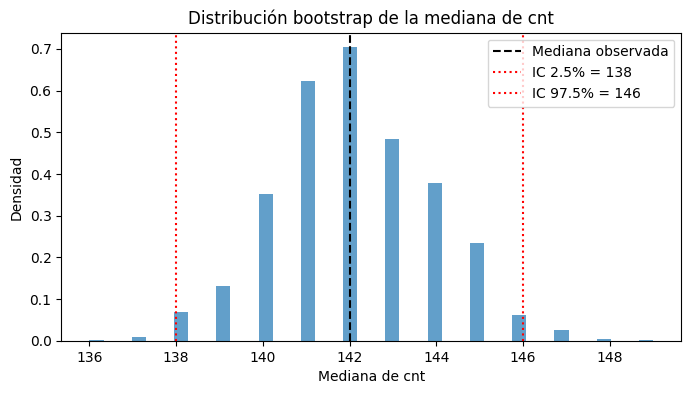

In [ ]:
# Número de remuestreos
n_iterations = 5000
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()

# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

sample = df['cnt'].values
n = len(sample)
rng = np.random.default_rng(123)  # reproducibilidad

# Remuestreo bootstrap: calcular medianas
medians = np.empty(n_iterations)
for i in range(n_iterations):
    idx = rng.integers(0, n, size=n)   # muestreo con reemplazo
    medians[i] = np.median(sample[idx])

# IC percentil 95% (2.5% - 97.5%)
alpha = 0.05
lower, upper = np.percentile(medians, [100*alpha/2, 100*(1-alpha/2)])

# Estadísticos
median_observada = np.median(sample)
mean_boot = medians.mean()
bias = mean_boot - median_observada

print(f"Mediana observada (muestra): {median_observada:.2f}")
print(f"Mediana bootstrap (promedio remuestreos): {mean_boot:.2f}")
print(f"Bias estimado (bootstrap - observada): {bias:.2f}")
print(f"IC bootstrap percentil 95% para la mediana: [{lower:.2f}, {upper:.2f}]")

# Gráfico de la distribución bootstrap de las medianas
plt.figure(figsize=(8,4))
plt.hist(medians, bins=40, density=True, alpha=0.7)
plt.axvline(median_observada, color='black', linestyle='--', label='Mediana observada')
plt.axvline(lower, color='red', linestyle=':', label=f'IC 2.5% = {lower:.0f}')
plt.axvline(upper, color='red', linestyle=':', label=f'IC 97.5% = {upper:.0f}')
plt.title('Distribución bootstrap de la mediana de cnt')
plt.xlabel('Mediana de cnt')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Interpretación pregunta 5

In [ ]:
!pip install ucimlrepo -q